In [1]:
import fasttext
import numpy as np
import pandas as pd

In [3]:
df = pd.read_json('sentimen_analisis.json')


In [4]:
model = fasttext.train_unsupervised('data_train_fasttext.txt', minn=3, maxn=6, dim=100)

In [6]:
arr = []
for i in df['stemmed']:
    arr.append(model.get_sentence_vector(' '.join(i)))

arr = np.array(arr)

In [7]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
label = df['label'].values
y = labenc.fit_transform(label)

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(arr,y,test_size = 0.25,random_state=0)

In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(xtrain, ytrain)

GaussianNB()

In [10]:
ypred=clf.predict(xtest)

Nilai Akurasi :  0.6626666666666666
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       491
           1       0.52      0.27      0.35       259

    accuracy                           0.66       750
   macro avg       0.61      0.57      0.56       750
weighted avg       0.63      0.66      0.63       750



<AxesSubplot:>

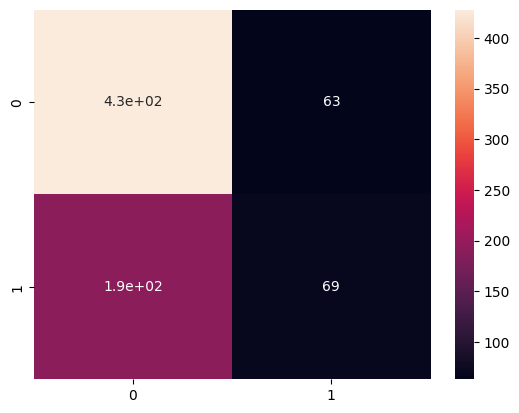

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

print("Nilai Akurasi : ",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
sb.heatmap(confusion_matrix(ytest,ypred),annot=True)